In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_excel('bank-additional-full.xlsx')
df

,age,job,marital status,education,credit default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [25]:
df.shape

(41188, 21)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital status  41188 non-null  object 
 3   education       41188 non-null  object 
 4   credit default  41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [28]:
df.replace("unknown", np.nan, inplace=True)

In [29]:
df.isnull().sum()

,0
age,0
job,330
marital status,80
education,1731
credit default,8597
housing,990
loan,990
contact,0
month,0
day_of_week,0


In [30]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [43]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].value_counts()
    print(f"Value counts for {col}:")
    print(df[col].value_counts())

Value counts for job:
job
admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64
Value counts for marital status:
marital status
married     25008
single      11568
divorced     4612
Name: count, dtype: int64
Value counts for education:
education
university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: count, dtype: int64
Value counts for credit default:
credit default
no     41185
yes        3
Name: count, dtype: int64
Value counts for housing:
housing
yes    22566
no     18622
Name: count, dtype: int64
Value counts for loan:
loan
no     34940
yes     6248
Name: count, dtype: int64
Value counts for contact:
contact


In [31]:
df[col].value_counts()

,count
y,
no,36548
yes,4640


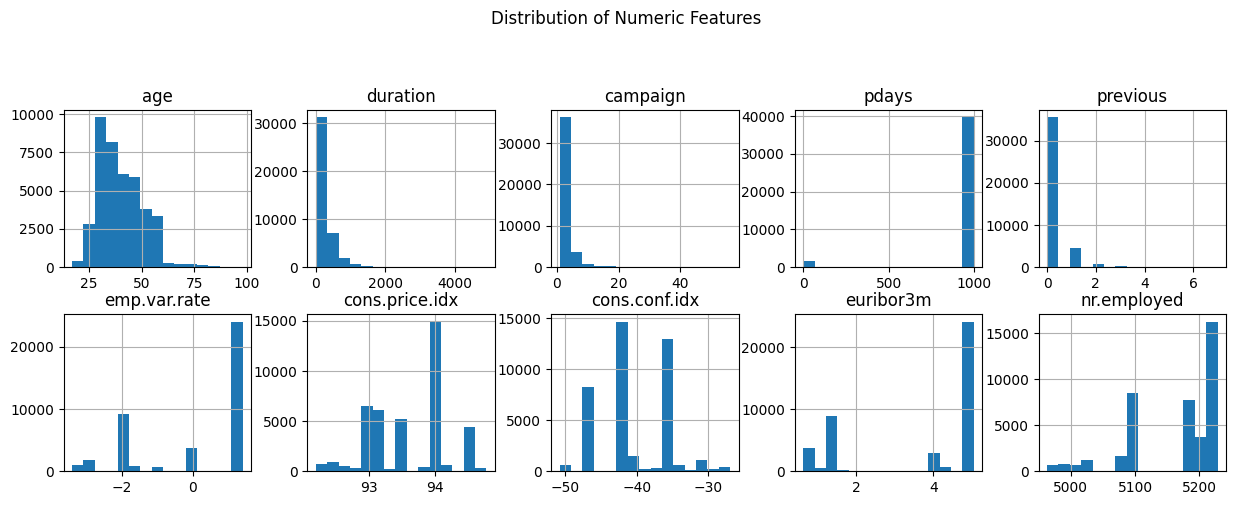

In [32]:
# Distribution of numeric features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(bins=15, figsize=(15, 10), layout=(4, 5))
plt.suptitle("Distribution of Numeric Features")
plt.show()

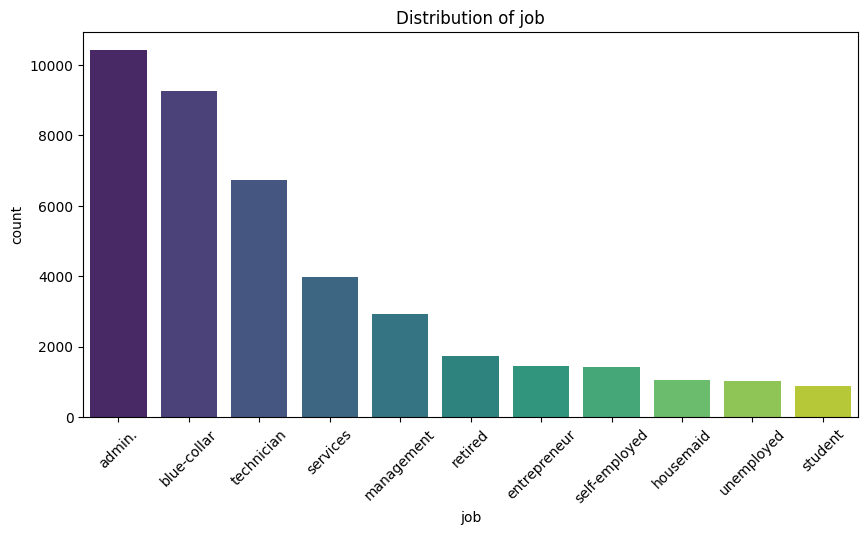

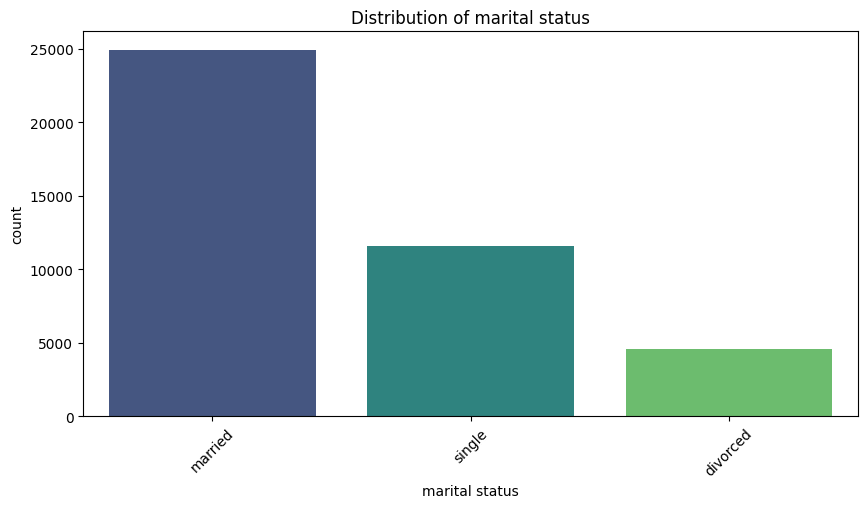

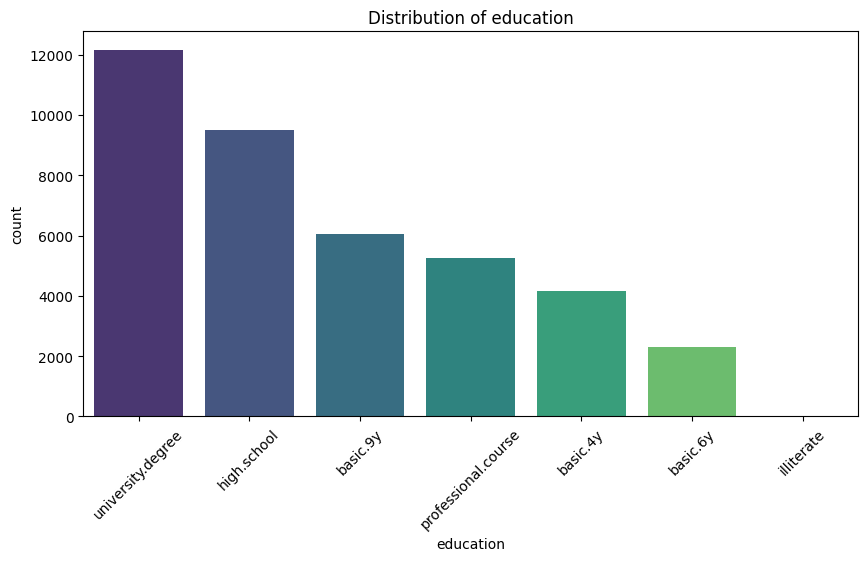

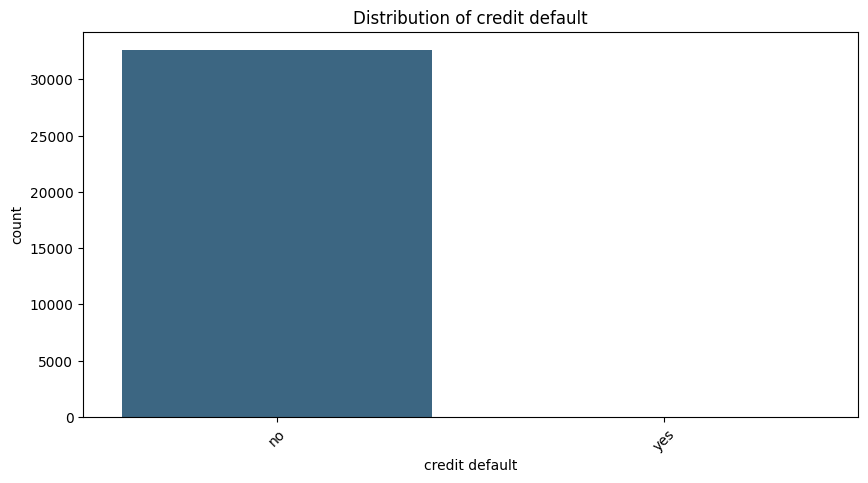

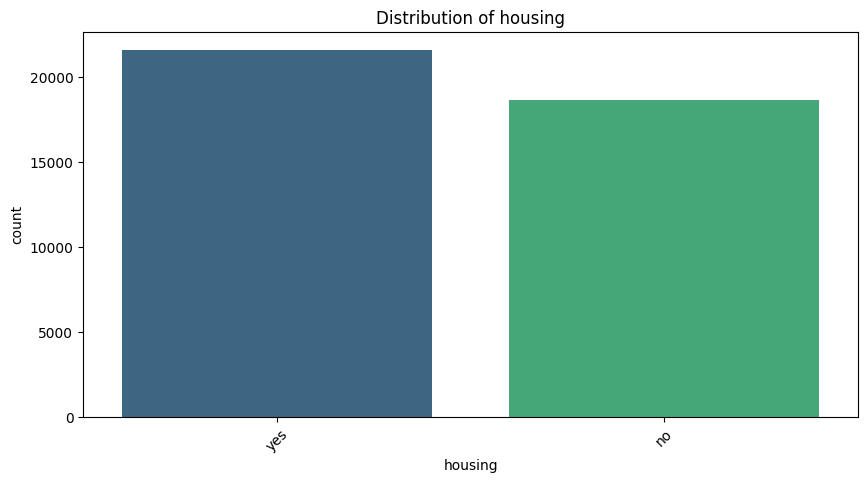

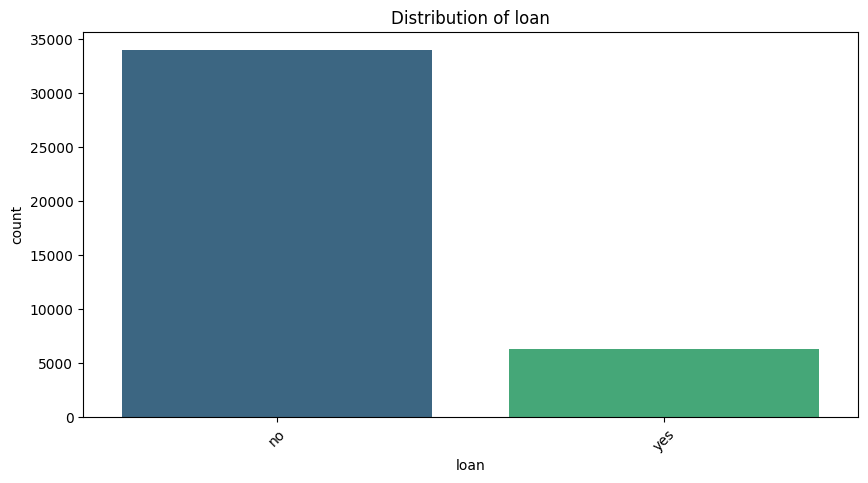

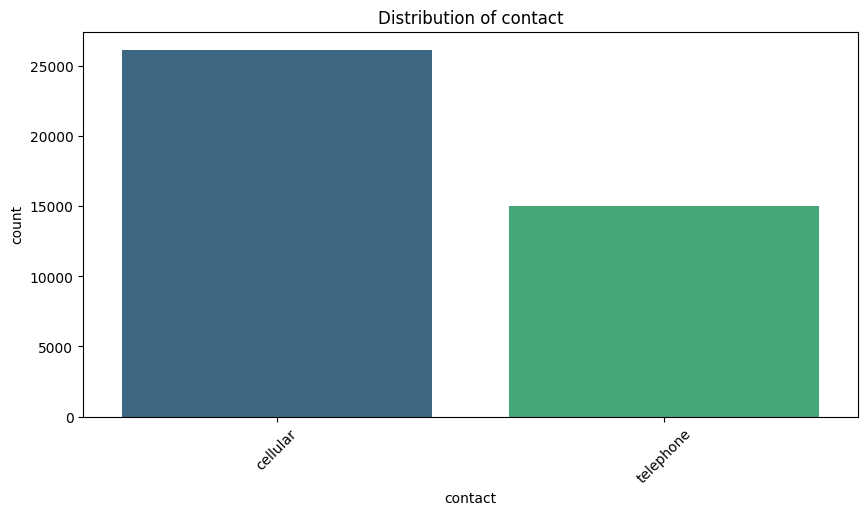

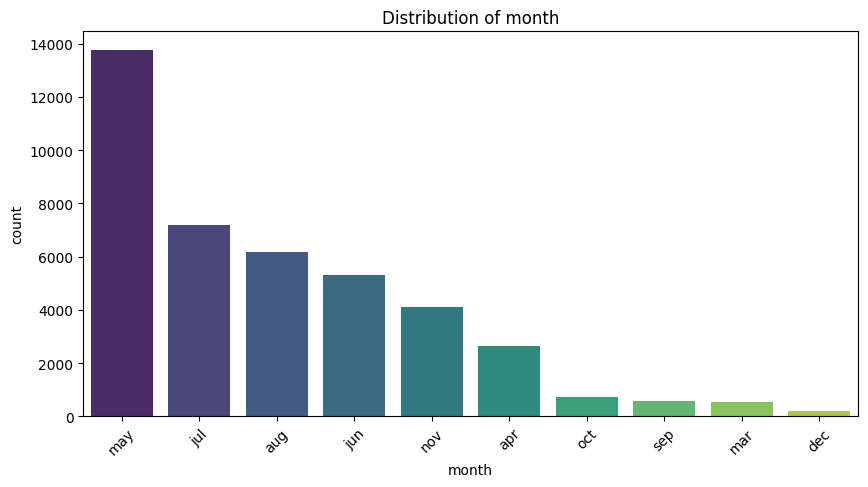

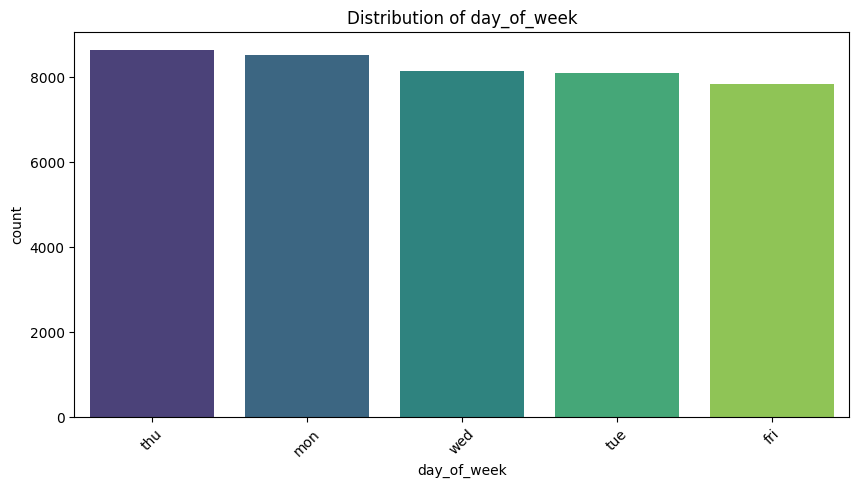

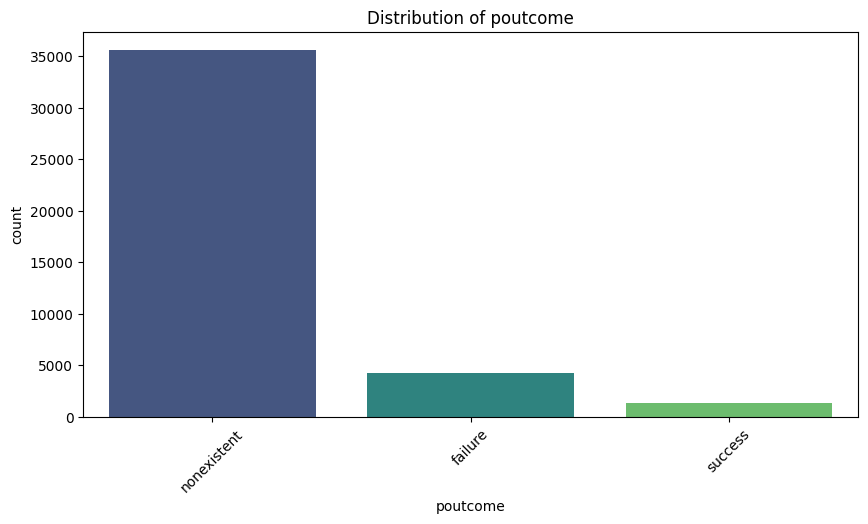

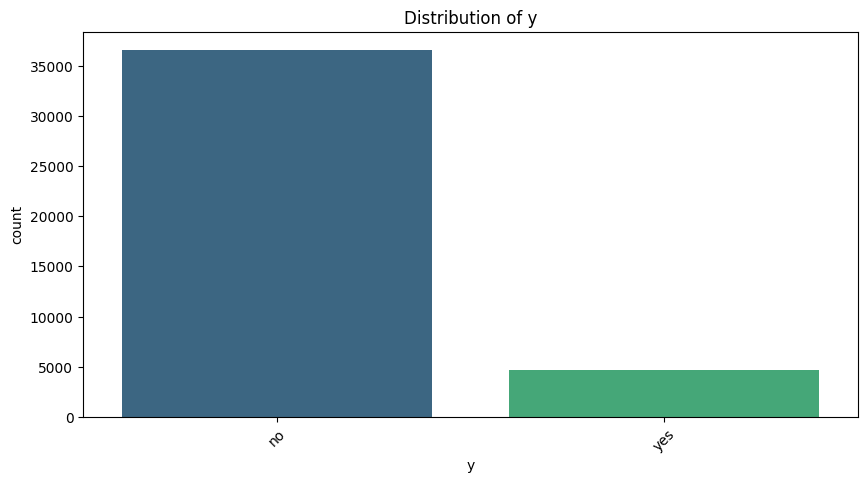

In [33]:
# Bar plots for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()


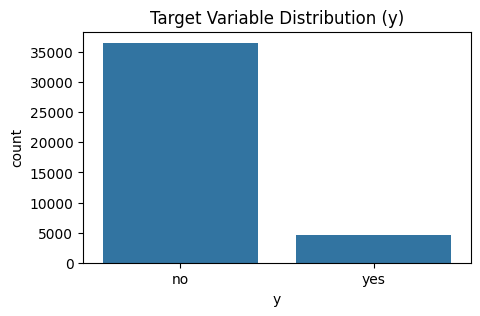

In [34]:
# Target Variable Analysis (y)
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='y')
plt.title("Target Variable Distribution (y)")
plt.show()

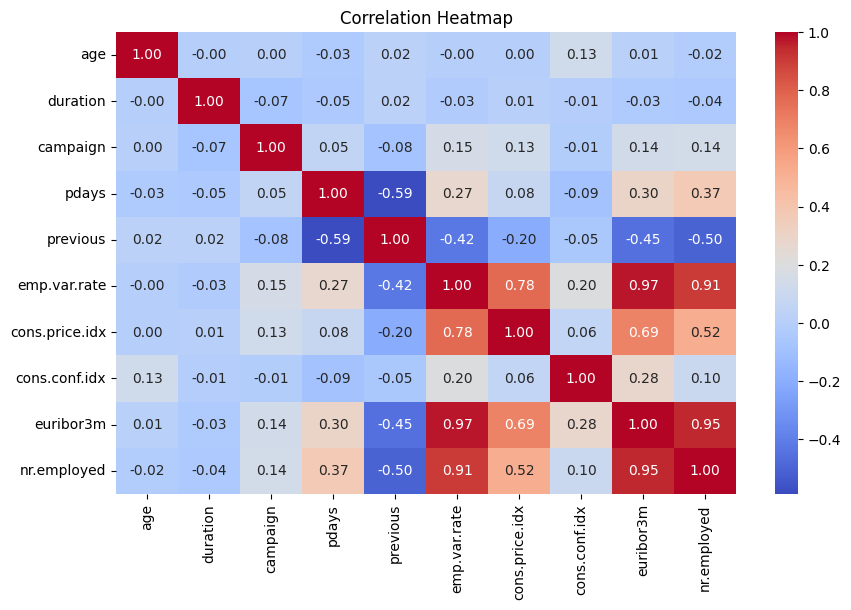

In [35]:
# Correlation Heatmap for Numeric Features
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

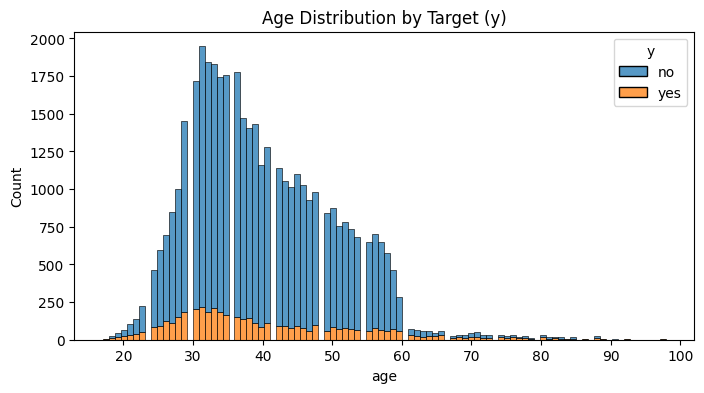

In [36]:
# Relationship between 'age' and 'y'
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='age', hue='y', multiple='stack')
plt.title("Age Distribution by Target (y)")
plt.show()

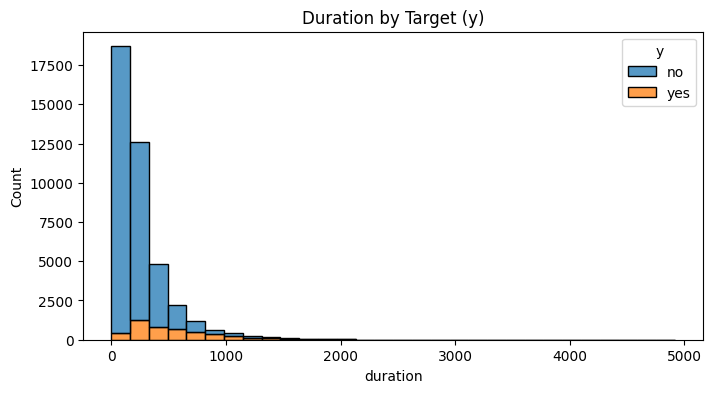

In [37]:
# Relationship between 'duration' and target (y)
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='duration', hue='y', multiple='stack', bins=30)
plt.title("Duration by Target (y)")
plt.show()

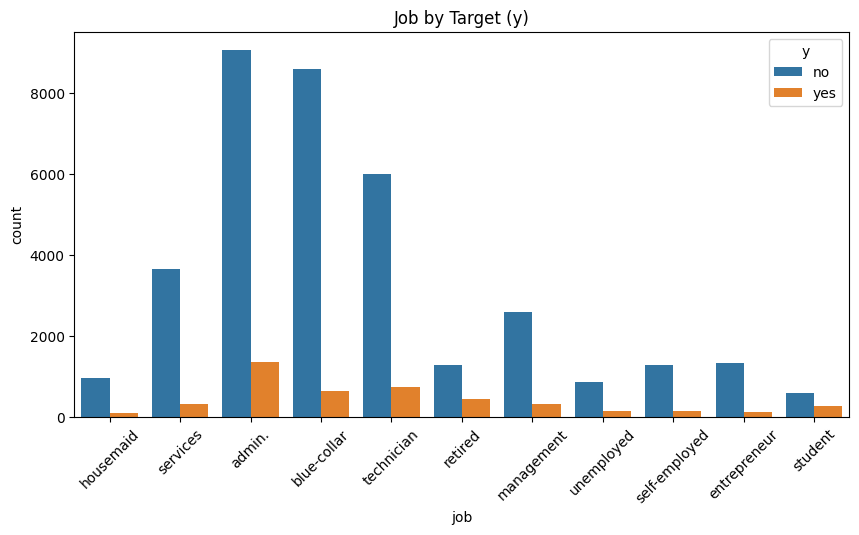

In [38]:
# Relationship between 'job' and 'y'
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='job', hue='y')
plt.xticks(rotation=45)
plt.title("Job by Target (y)")
plt.show()

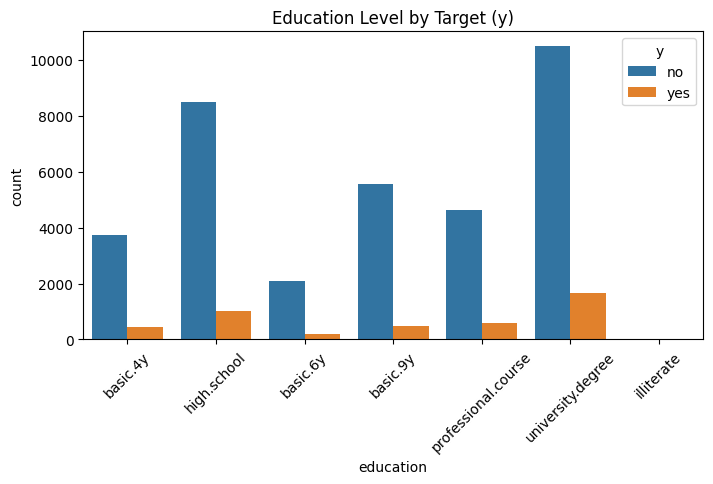

In [39]:
# Relationship between 'education' and 'y'
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='education', hue='y')
plt.xticks(rotation=45)
plt.title("Education Level by Target (y)")
plt.show()

In [40]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values for numeric columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        # Using median to handle potential skewness
        df[col].fillna(df[col].median(), inplace=True)

# Impute missing values for categorical columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        # Using mode (most frequent value) for categorical columns
        df[col].fillna(df[col].mode()[0], inplace=True)

# Check if there are any remaining missing values
print("\nMissing Values After Imputation:\n", df.isnull().sum())


Missing Values After Imputation:
 age               0
job               0
marital status    0
education         0
credit default    0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
